# Import Data-Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d=pd.read_excel(r'C:\Users\User\Downloads\amazonm.xlsx')

# Display Top 5 Rows

In [4]:
d.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Display Last 5 Rows

In [5]:
d.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# Print Shape,Size,Rows,columns,inforamation about the DataSet

In [6]:
print(d.size)
print(d.shape[0])
print(d.shape[1])
print(d.shape)

32270
6454
5
(6454, 5)


In [7]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB
None


# Check Duplicate Values and Drop them.

In [9]:
t=d.duplicated().any()
t

True

In [10]:
d.drop_duplicates(inplace=True)

In [11]:
d.duplicated().any()

False

In [12]:
d.shape
#now shape is changed

(6422, 5)

# Check Null values

In [13]:
d.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<AxesSubplot:>

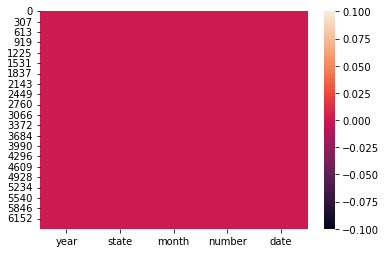

In [14]:
sns.heatmap(d.isna())
# null values are not present

# Overall  Statistics About DataSet

In [15]:
d.describe(include="all")

C:\Users\User\AppData\Local\Temp/ipykernel_10944/3186035470.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d.describe(include="all")


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


# Rename Month Names To English

In [16]:
d["month"]=d["month"].map({'Janeiro':'Jan',
            'Fevereiro':'Feb',
        "Março":'Mar',
        'Abril':'Apr' ,  
'Maio':'May',
'Junho':'Jun',
'Julho':'Jul',
'Agosto':'Aug',
'Setembro':'Sept',
'Outubro':'Oct',
'Novembro':'Nov',
'Dezembro':'Dec'})



In [17]:
d

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dec,128.0,2012-01-01
6450,2013,Tocantins,Dec,85.0,2013-01-01
6451,2014,Tocantins,Dec,223.0,2014-01-01
6452,2015,Tocantins,Dec,373.0,2015-01-01


# Total Number of Fires Registered

In [18]:
d["number"].count()

6422

# In Which Month Maximum Number of Forest Fires Were Reported?

In [20]:
d1=d.groupby("month")["number"].sum().reset_index()
d1

,month,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


<AxesSubplot:xlabel='month', ylabel='number'>

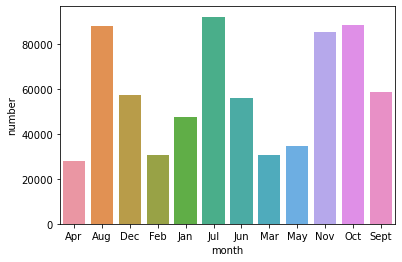

In [21]:
sns.barplot(x="month",y="number",data=d1)

# In Which Year Maximum Number of Forest Fires Was Reported?

In [22]:
d2=d.groupby("year")["number"].sum().reset_index()
d2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

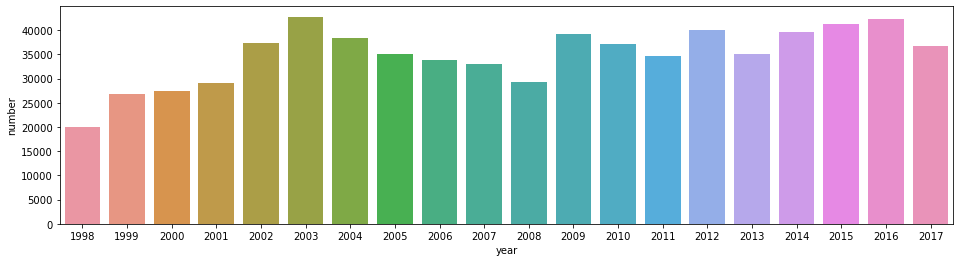

In [23]:
plt.figure(figsize=(16,4))
sns.barplot(x="year",y="number",data=d2)

# In Which State Maximum Number of Forest Fires Was Reported?

In [24]:
d3=d.groupby("state")["number"].sum().reset_index()
d3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


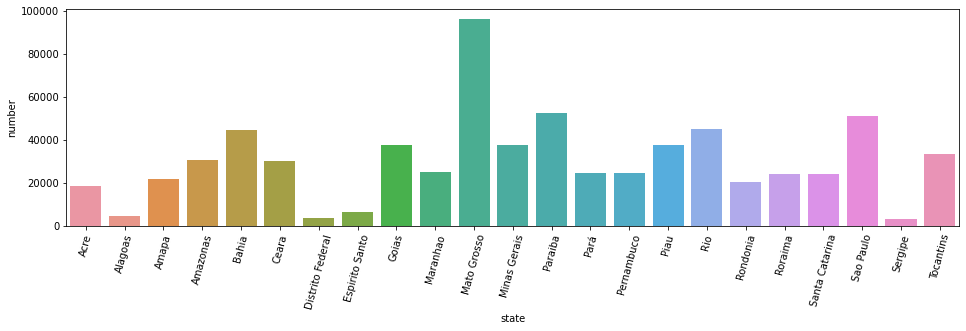

In [25]:
plt.figure(figsize=(16,4))
sns.barplot(x="state",y="number",data=d3)
plt.xticks(rotation=75)
plt.show()

# Find Total Number of Fires Were Reported In Amazonas

In [26]:
t=d[d["state"]=="Amazonas"]
t["number"].sum()

30650.129

# Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [27]:
t=d[d["state"]=="Amazonas"]
d4=t.groupby("year")["number"].sum().reset_index()
d4

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


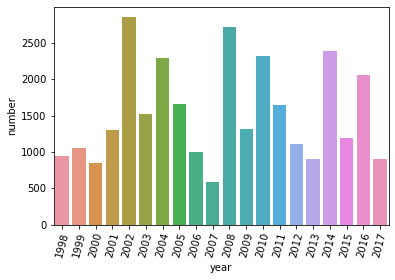

In [28]:
sns.barplot(x="year",y="number",data=d4)
plt.xticks(rotation=75)
plt.show()

# Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [29]:
t=d[d["state"]=="Amazonas"]
day=t.groupby(t["date"].dt.dayofweek).sum().number
import calendar
day.index=[calendar.day_name[x] for x in range (0,7 )]
day=day.reset_index()

In [30]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


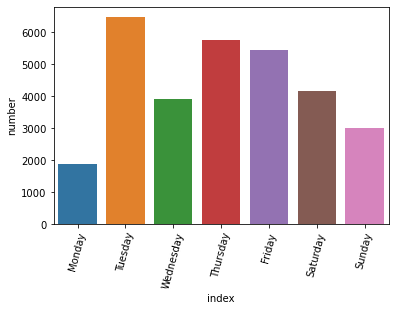

In [31]:
sns.barplot(x="index",y="number",data=day)
plt.xticks(rotation=75)
plt.show()

# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [32]:
t=d[d["year"]==2015]

In [33]:
y=t.groupby("month")["number"].sum().reset_index()
y

,month,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,Jul,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


<AxesSubplot:xlabel='month', ylabel='number'>

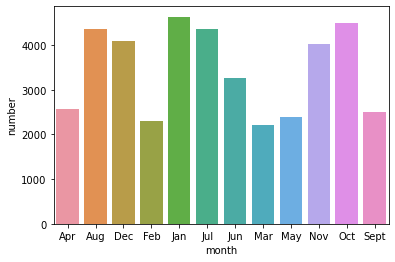

In [34]:
sns.barplot(x="month",y="number",data=y)

# Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [35]:
u=d.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()
u

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


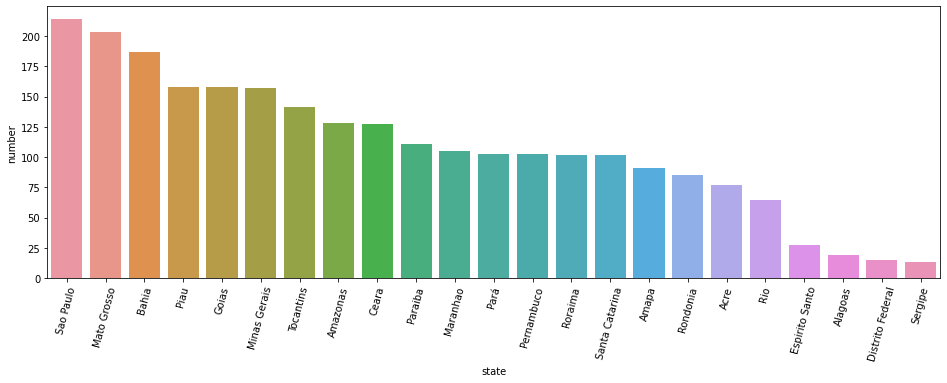

In [36]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=u)
plt.xticks(rotation=75)
plt.show()



# To Find The State Names Where Fires Were Reported In 'dec' Month

In [37]:
t=d[d["month"]=="Dec"]
yk=t["state"].unique()
yk

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [38]:
d.sort_values(by="year",ascending=False)

,year,state,month,number,date
4004,2017,Pernambuco,Sept,69.000,2017-01-01
5239,2017,Rondonia,Nov,372.000,2017-01-01
1833,2017,Espirito Santo,Aug,30.000,2017-01-01
1255,2017,Ceara,Mar,4.000,2017-01-01
4761,2017,Rio,Nov,89.000,2017-01-01
...,...,...,...,...,...
4523,1998,Rio,Dec,1.000,1998-01-01
499,1998,Amapa,Feb,0.000,1998-01-01
2093,1998,Goias,Oct,1.034,1998-01-01
5996,1998,Sergipe,Feb,0.000,1998-01-01


In [58]:
q = d.groupby(['year'], as_index=False).sum()
q

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


# Prediction of forest fire in year 2019 to 2023

In [59]:
import math
poly = np.polyfit(q['year'],q['number'],3)
z = np.poly1d(poly)
z

poly1d([ 1.30845978e+01, -7.88576575e+04,  1.58418372e+08, -1.06082867e+11])

In [53]:
for i in range(2019,2024,1):
    print(i, '->', math.trunc(z(i)))

2019 -> 47860
2020 -> 52052
2021 -> 57114
2022 -> 63124
2023 -> 70162
